In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

In [42]:
import dev.astromet.astromet as astromet
import numpy as np
import matplotlib.pyplot as plt
import tqdm

# an object wich holds all the necessary parameters to generate the astrometric track
params=astromet.params()

# center of mass parameters
params.ra=160     #[deg]
params.dec=-50    #[deg]
params.drac=0     #[mas]
params.ddec=0     #[mas]
params.pmrac=8    #[mas/yr]
params.pmdec=-2   #[mas/yr]
params.pllx=5     #[mas]

In [3]:
# random times between 2014 and 2018 - a very rough approximation to Gaia eDR3
ts=2014 + 4*np.random.rand(100)

# finds the exact position in RAcos(Dec) and Dec [mas]
racs,decs=astromet.track(ts,params)

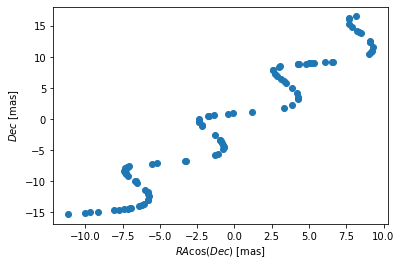

In [4]:
ax=plt.gca()
ax.scatter(racs,decs)
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/singleBody.png')
plt.show()

In [5]:
# binary parameters
# (for single stars leave these blank or set l=q)
params.period=2      #[yr]
params.a=2    #[AU]
params.e=0.8
params.q=0.5
params.l=0.1
# viewing angle
params.vphi=4.5   #[rad]
params.vtheta=1.5 #[rad]
params.vomega=5.6 #[rad]
# time of some periapse passage
params.tperi=2016 #[jyear]

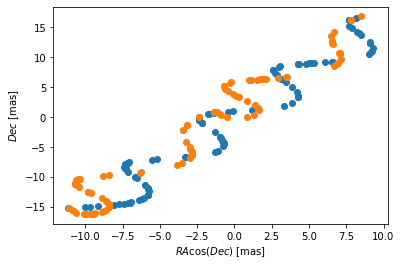

In [6]:
bracs,bdecs=astromet.track(ts,params)

ax=plt.gca()
ax.scatter(racs,decs)
ax.scatter(bracs,bdecs)
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBody.png')
plt.show()

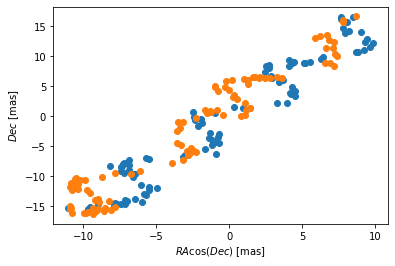

In [35]:
ast_error=0.3 # [mas]

obsracs=racs+ast_error*np.random.randn(ts.size)
obsdecs=decs+ast_error*np.random.randn(ts.size)

bobsracs=bracs+ast_error*np.random.randn(ts.size)
bobsdecs=bdecs+ast_error*np.random.randn(ts.size)

ax=plt.gca()
ax.scatter(obsracs,obsdecs)
ax.scatter(bobsracs,bobsdecs)
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBodyError.png')
plt.show()

In [51]:
results=astromet.simple_fit(ts,obsracs,obsdecs,ast_error,params.ra,params.dec)
print(results)

{'astrometric_matched_transits': 100, 'visibility_periods_used': 74, 'astrometric_n_obs_al': 200, 'astrometric_params_solved': 31, 'drac': -0.009982054996942186, 'drac_error': 0.030180777265569076, 'ddec': -0.013148563085311177, 'ddec_error': 0.03017953203751618, 'drac_ddec_corr': 0.00013358495024689537, 'parallax': 4.999733625222756, 'parallax_error': 0.025740848099767042, 'drac_parallax_corr': 0.05870691132052432, 'ddec_parallax_corr': -0.0015343400075869971, 'pmrac': 8.049559483605737, 'pmrac_error': 0.02551389002885625, 'drac_pmrac_corr': 0.0010801513007877486, 'ddec_pmrac_corr': 0.062126757314268345, 'parallax_pmrac_corr': -0.012406482556475676, 'pmdec': -1.9926893944343775, 'pmdec_error': 0.04148940631653204, 'drac_pmdec_corr': 0.01345600472104839, 'ddec_pmdec_corr': 0.009927534436572898, 'parallax_pmdec_corr': -0.15455398491840128, 'pmrac_pmdec_corr': 0.08027280929072023, 'UWE': 1.0040287275558353}


In [52]:
bresults=astromet.simple_fit(ts,bobsracs,bobsdecs,ast_error,params.ra,params.dec)
print(bresults)

{'astrometric_matched_transits': 100, 'visibility_periods_used': 74, 'astrometric_n_obs_al': 200, 'astrometric_params_solved': 31, 'drac': -2.2870967072220436, 'drac_error': 0.09908310086934491, 'ddec': -1.894085652363449, 'ddec_error': 0.09907901280177511, 'drac_ddec_corr': 0.00013358495024689537, 'parallax': 5.069721295434636, 'parallax_error': 0.08450687092281592, 'drac_parallax_corr': 0.05870691132052431, 'ddec_parallax_corr': -0.001534340007586997, 'pmrac': 8.027609620040499, 'pmrac_error': 0.08376177051551725, 'drac_pmrac_corr': 0.0010801513007877486, 'ddec_pmrac_corr': 0.062126757314268345, 'parallax_pmrac_corr': -0.012406482556475678, 'pmdec': -1.8304525216189864, 'pmdec_error': 0.13620918357725625, 'drac_pmdec_corr': 0.013456004721048388, 'ddec_pmdec_corr': 0.0099275344365729, 'parallax_pmdec_corr': -0.15455398491840128, 'pmrac_pmdec_corr': 0.08027280929072023, 'UWE': 3.2962133086488303}


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


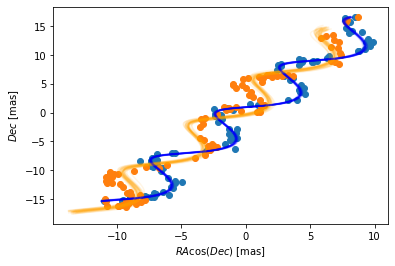

In [56]:
ax=plt.gca()
ax.scatter(obsracs,obsdecs)
ax.scatter(bobsracs,bobsdecs)

plotts=np.linspace(np.min(ts),np.max(ts),200)
fitparams=astromet.params()
bfitparams=astromet.params()
for i in range(32):
    print(i)
    fitparams.ra=160     #[deg]
    fitparams.dec=-50    #[deg]
    fitparams.drac=results['drac']+results['drac_error']*np.random.randn()     #[mas]
    fitparams.ddec=results['ddec']+results['ddec_error']*np.random.randn()     #[mas]
    fitparams.pmrac=results['pmrac']+results['pmrac_error']*np.random.randn()    #[mas/yr]
    fitparams.pmdec=results['pmdec']+results['pmdec_error']*np.random.randn()   #[mas/yr]
    fitparams.pllx=results['parallax']+results['parallax_error']*np.random.randn()     #[mas]
    
    fitracs,fitdecs=astromet.track(plotts,fitparams)
    ax.plot(fitracs,fitdecs,c='blue',alpha=0.1)
    
    bfitparams.ra=160     #[deg]
    bfitparams.dec=-50    #[deg]
    bfitparams.drac=bresults['drac']+bresults['drac_error']*np.random.randn()     #[mas]
    bfitparams.ddec=bresults['ddec']+bresults['ddec_error']*np.random.randn()     #[mas]
    bfitparams.pmrac=bresults['pmrac']+bresults['pmrac_error']*np.random.randn()    #[mas/yr]
    bfitparams.pmdec=bresults['pmdec']+bresults['pmdec_error']*np.random.randn()   #[mas/yr]
    bfitparams.pllx=bresults['parallax']+bresults['parallax_error']*np.random.randn()     #[mas]    

    bfitracs,bfitdecs=astromet.track(plotts,bfitparams)
    ax.plot(bfitracs,bfitdecs,c='orange',alpha=0.1)

ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBodyFit.png')
plt.show()

In [4]:
import numpy as np
import astropy
from astropy import units as u
import dev.astromet.astromet as astromet
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
print(dir(astromet))

['AU', 'AU_c', 'Delta', 'G', 'Galt', 'Gyr', 'T', 'Time', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abs_file_path', 'agis', 'agis_2d_prior', 'astropy', 'barycentricPosition', 'binaryMotion', 'bjd_to_bjyr', 'bjyr_to_bjd', 'bodyPos', 'c', 'day', 'design_matrix', 'design_simple', 'downweight', 'dtheta_full', 'dtheta_simple', 'e', 'en_fit', 'findEtas', 'fit', 'fit_model', 'gaia_fit', 'get_gaiat', 'get_obmt', 'kpc', 'lSun', 'local_dir', 'mSun', 'mags', 'mas', 'mas2rad', 'mock_obs', 'np', 'os', 'params', 'rel_path', 'scipy', 'sigString', 'sigma_al_data', 'sigma_als', 'sigma_ast', 'sigmagamma', 'splitFit', 'splitInverse', 'splitNormal', 'sys', 'totalmass', 'track', 'u', 'year']


In [6]:
dr2period=22/12 # in years
edr3Period=34/12 # in years
mas=astromet.mas # conversion from degrees to milli-arcseconds

In [7]:
# an object wich holds all the necessary parameters to find the astrometric path
params=astromet.params()

# For this example we'll generate a random binary system

# center of mass parameters
params.ra=360*np.random.rand()
params.dec=90*(-1+2*np.random.rand())
print('RA and Dec [degrees]: \n',params.ra,params.dec)
params.drac=0 # zero offset from angular position
params.ddec=0
params.pmrac=10*np.random.randn()
params.pmdec=10*np.random.randn()
print('Proper motion in RA and Dec [mas/yr]: \n',params.pmrac,params.pmdec)
params.pllx=1+9*np.random.rand()
print('Parallax [mas]: \n',params.pllx)

# binary parameters
params.period=40*np.random.rand()**2
print('Period [years]: \n',params.period)
params.a=100*np.random.rand()
print('Semi-major axis [AU]: \n',params.a)
params.e=np.random.rand()
print('Eccentricity [dimensionless]: \n',params.e)
params.q=10*(np.random.rand()**4)
params.l=np.random.rand()
print('Light (l<1) and mass (q) ratios of binary [dimensionless]: \n',params.l,params.q)
params.vphi=2*np.pi*np.random.rand()
params.vtheta=np.pi*np.random.rand()
print('On-sky projection angles (vPhi and vTheta) of binary [radians]: \n',params.vphi,params.vtheta)
params.vomega=2*np.pi*np.random.rand()
print('On-sky orientation angle of binary [radians]: \n',params.vomega)
params.tperi=2016+params.period*np.random.rand()
print('Time of first binary periapse [years]: \n',params.tperi)

print('\Total mass [mSun]: \n',astromet.totalmass(params))
print('\Delta [dless]: \n',astromet.Delta(params))

RA and Dec [degrees]: 
 142.01577012548583 45.44129373439794
Proper motion in RA and Dec [mas/yr]: 
 -10.205078093254482 1.467913448706585
Parallax [mas]: 
 5.747337597727457
Period [years]: 
 32.902073468938895
Semi-major axis [AU]: 
 56.364247638881494
Eccentricity [dimensionless]: 
 0.4206149193580654
Light (l<1) and mass (q) ratios of binary [dimensionless]: 
 0.9506362846364713 3.829018278769052
On-sky projection angles (vPhi and vTheta) of binary [radians]: 
 4.38053554110894 2.894951433832293
On-sky orientation angle of binary [radians]: 
 1.9216304441644927
Time of first binary periapse [years]: 
 2037.5930611503427
\Total mass [mSun]: 
 8.036725066956923e-06
\Delta [dless]: 
 0.30557180637401643


256  vs  256
256


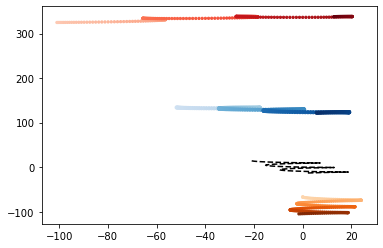

In [16]:
# calculating the on-sky path
plotts=np.linspace(2016-0.5*edr3Period,2016+0.5*edr3Period,256)

# first just the c.o.m. 
raccoms,deccoms=astromet.track(plotts,params,comOnly=True)
# then the positions of the centre of light, and both masses
raccols,deccols,rac1s,dec1s,rac2s,dec2s=astromet.track(plotts,params,allComponents=True)

# colouring by time (white to coloured)
ccols=mpl.cm.Blues(np.interp(plotts,[plotts[0],plotts[-1]],[0.2,1]))
c1s=mpl.cm.Reds(np.interp(plotts,[plotts[0],plotts[-1]],[0.2,1]))
c2s=mpl.cm.Oranges(np.interp(plotts,[plotts[0],plotts[-1]],[0.2,1]))

ss=np.ones_like(plotts)

# plotting
trackPlot=plt.gca()
trackPlot.plot(raccoms,deccoms,c='k',ls='--')
trackPlot.scatter(raccols,deccols,c=ccols,s=10)
trackPlot.scatter(rac1s,dec1s,c=c1s,s=10/(1+params.l))
trackPlot.scatter(rac2s,dec2s,c=c2s,s=10*params.l/(1+params.l))
plt.show()

0.3304034034155648
1000  vs  1000
0.7835099431207907
1000  vs  1000
1.8579948772411023
1000  vs  1000
4.406000197143605
1000  vs  1000
10.448273014646414
1000  vs  1000
24.77675989650674
1000  vs  1000
58.75495693006828
1000  vs  1000
139.32995994124695
1000  vs  1000
330.4034034155648
1000  vs  1000


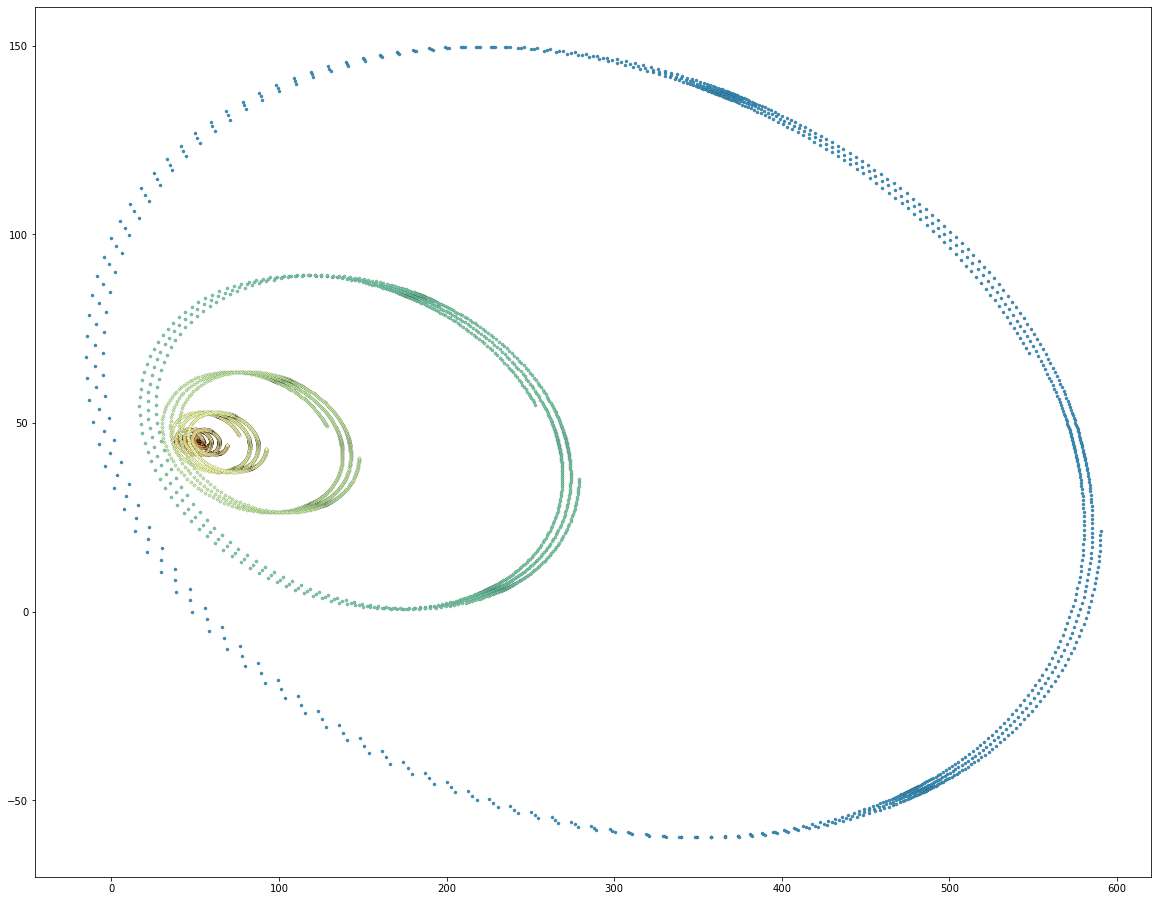

In [17]:
ra=168.822791746732
dec=-52.67101756954034

pmra=7.475988873971572
pmdec=-2.479795383222872
pllx=4.9486674220605735
M=818.576627957461
a=10.448273014646414
e=0.8343208178025897
l=0.2468491575204601
q=2.0907266576304272e-05
vPhi=4.51073351780632
vTheta=1.551335064467769
vOmega=5.608334008004396
t0=2016.0984934731916

ntrack=9
alist=a*10**np.linspace(-1.5,1.5,ntrack)

plotts=np.linspace(2016-0.5*edr3Period,2016+0.5*edr3Period,1000)
qFig=plt.figure(figsize=(20,16))
qPl=plt.gca()

for i in range(ntrack):
    params=astromet.params()

    params.RA=ra-2*(i**2)*astromet.mas
    params.Dec=dec+8*i*astromet.mas
    params.pmRAc=pmra
    params.pmDec=pmdec
    params.pllx=pllx
    params.M=M
    params.a=alist[i]
    print(params.a)
    params.e=e
    params.q=q
    params.l=l
    params.vPhi=vPhi
    params.vTheta=vTheta
    params.vOmega=vOmega
    params.tPeri=t0
    
    raccols,deccols=astromet.track(plotts,params)
    c=mpl.cm.Spectral(i/ntrack)
    qPl.scatter(raccols,deccols,color=c,s=10,zorder=2,edgecolor='k',lw=0.1)
    #qPl.scatter(raccols,deccols,color='k',s=16,zorder=1)
    
#plt.savefig('astrometricTracksExample.pdf')
plt.show()

100  vs  100


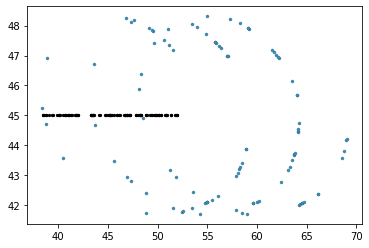

In [18]:
ts=2016+np.sort(edr3Period*(-0.5+np.random.rand(100)))
qPl=plt.gca()
params.pmRAc=2*pmra
params.pmDec=2*pmdec
params.a=alist[4]
raccoms,deccoms=astromet.track(ts,params,comOnly=True)
raccols,deccols=astromet.track(ts,params)

phis=360*np.random.rand(ts.size)

talls=np.hstack([ts,ts])
phialls=np.hstack([phis,phis+90])
racalls=np.hstack([raccols,raccols])
decalls=np.hstack([deccols,deccols])
erralls=np.hstack([0.1*np.ones(ts.size),0.3*np.ones(ts.size)])

xs=astromet.mock_obs(phialls,racalls,decalls,err=erralls)

results=astromet.gaia_fit(talls,xs,phialls,erralls,params.RA,params.Dec)


c=mpl.cm.Spectral(i/ntrack)
qPl.scatter(raccoms,deccoms,color='k',s=5,zorder=2)
qPl.scatter(raccols,deccols,color=c,s=10,zorder=2,edgecolor='k',lw=0.1)
plt.show()

In [19]:
print(results)

{'astrometric_matched_transits': 200, 'visibility_periods_used': 60, 'astrometric_n_obs_al': 1800, 'astrometric_params_solved': 31, 'ra': 56.02243969309585, 'ra_error': 0.06835532947335395, 'dec': 44.535002436522824, 'dec_error': 0.0682658898482943, 'ra_dec_corr': -0.0015578587512616632, 'parallax': 2.5817658841299855, 'parallax_error': 0.07632613014274307, 'ra_parallax_corr': 0.02364977842948384, 'dec_parallax_corr': -0.08479516168931815, 'pmra': 4.849115716122596, 'pmra_error': 0.08512224638611879, 'ra_pmra_corr': -0.1295821097979518, 'dec_pmra_corr': 0.0018654420615209198, 'parallax_pmra_corr': -0.05451000277197376, 'pmdec': -0.58201460842084, 'pmdec_error': 0.08491997608992587, 'ra_pmdec_corr': -0.0045725535950775385, 'dec_pmdec_corr': -0.1179855872847838, 'parallax_pmdec_corr': -0.07666234714833324, 'pmra_pmdec_corr': 0.003180607640285812, 'astrometric_excess_noise': 4.044954992589673, 'astrometric_chi2_al': 1754938.2151756776, 'astrometric_n_good_obs_al': 1800, 'UWE': 31.26789818

In [20]:
# simulating observables

# times when system is observed [years, CE]
ts=2016+np.sort(edr3Period*(-0.5+np.random.rand(64)))

raccols,deccols=astromet.track(ts,params)

phis=360*np.random.rand(ts.size)

talls=np.hstack([ts,ts])
phialls=np.hstack([phis,phis-90])
racalls=np.hstack([raccols,raccols])
decalls=np.hstack([deccols,deccols])
erralls=np.hstack([0.3*np.ones(ts.size),np.ones(ts.size)])

xs=astromet.mock_obs(phialls,racalls,decalls,err=erralls)

results=astromet.gaia_fit(talls,xs,phialls,erralls,params.RA,params.Dec)

'''scanPlot=plt.gca()
for i in range(xs.size):
    xvals=[(xs[i]-erralls[i])*np.sin(phialls[i]),(xs[i]+erralls[i])*np.sin(phialls[i])]
    yvals=[(xs[i]-erralls[i])*np.cos(phialls[i]),(xs[i]+erralls[i])*np.cos(phialls[i])]
    scanPlot.plot(xvals,yvals)
plt.show()'''

64  vs  64


'scanPlot=plt.gca()\nfor i in range(xs.size):\n    xvals=[(xs[i]-erralls[i])*np.sin(phialls[i]),(xs[i]+erralls[i])*np.sin(phialls[i])]\n    yvals=[(xs[i]-erralls[i])*np.cos(phialls[i]),(xs[i]+erralls[i])*np.cos(phialls[i])]\n    scanPlot.plot(xvals,yvals)\nplt.show()'

In [21]:
print(params.RA)
print(params.Dec)
print(params.pmRAc)
print(params.pmDec)
print(params.pllx)
print(results)

168.82275619117647
-52.67099979176256
14.951977747943143
-4.959590766445744
4.9486674220605735
{'astrometric_matched_transits': 128, 'visibility_periods_used': 49, 'astrometric_n_obs_al': 1152, 'astrometric_params_solved': 31, 'ra': 56.77331564025604, 'ra_error': 0.08732107066118716, 'dec': 45.39389837649163, 'dec_error': 0.08698696262778859, 'ra_dec_corr': -0.003193551001717151, 'parallax': 1.3012703783163224, 'parallax_error': 0.09640594217955266, 'ra_parallax_corr': 0.05590541002138128, 'dec_parallax_corr': 0.14745097633396545, 'pmra': 5.226633913283271, 'pmra_error': 0.0997996891519359, 'ra_pmra_corr': -0.3357043788110087, 'dec_pmra_corr': -0.014014198223336502, 'parallax_pmra_corr': -0.1313437216946096, 'pmdec': -0.995053504479742, 'pmdec_error': 0.09834543122359142, 'ra_pmdec_corr': -0.0032976404180005987, 'dec_pmdec_corr': -0.3666110937441657, 'parallax_pmdec_corr': -0.15238955518751932, 'pmra_pmdec_corr': 0.000516468394677423, 'astrometric_excess_noise': 3.213112189061217, 'ast

In [22]:
xerrs=0.5*np.random.randn(phis.size)*np.sin(phis)+1.5*np.random.randn(phis.size)*np.cos(phis)
yerrs=0.5*np.random.randn(phis.size)*np.cos(phis)-1.5*np.random.randn(phis.size)*np.sin(phis)

1000  vs  1000


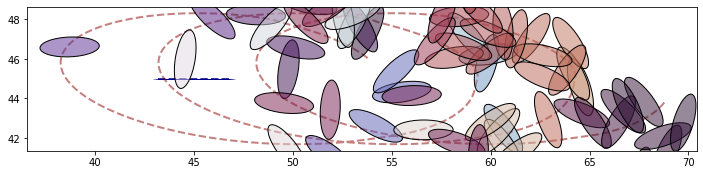

In [24]:
# plotting on sky motion
qFig=plt.figure(figsize=(12,8))
qPl=plt.gca() # defining matplotlib axis object on which to plot
qPl.set_aspect('equal')

cs=mpl.cm.twilight_shifted(np.interp(ts,[ts[0],ts[-1]],[0,1])) # optional, but I like to color by time
cs[:,3]=0.5

# plotting the datapoints (ideally as error ellipses -
# if that fails comment out the for loop and use the simpler scatter plot instead)
astError=0.3
for i in range(raccols.size):
    xval=raccols[i]+xerrs[i]
    yval=deccols[i]+yerrs[i]
    ell = mpl.patches.Ellipse(xy=(xval,yval),
                  width=1, height=3,
                  angle=phis[i])
    ell.set_facecolor(cs[i])
    ell.set_edgecolor('k')
    qPl.add_artist(ell)

# uniformly sampled times for plotting true paths
tUniform=np.linspace(ts[0],ts[-1],1000)

# optional - adding the centre of mass motion (black) for reference
comRas,comDecs=astromet.track(tUniform,params,comOnly=True)
qPl.plot(comRas,comDecs,lw=1,c='k',alpha=0.0,zorder=1)

# optional - adding the centre of mass motion (red) for reference
trueRas,trueDecs=astromet.track(tUniform,params)
qPl.plot(trueRas,trueDecs,lw=2,c='darkred',alpha=0.5,zorder=1,ls='--')

# optional - adding fitted motion (blue)
for i in range(32):
    randRa=results['ra']+results['ra_error']*np.random.randn()
    randDec=results['dec']+results['dec_error']*np.random.randn()
    randPmRa=results['pmra']+results['pmra_error']*np.random.randn()
    randPmDec=results['pmdec']+results['pmdec_error']*np.random.randn()
    randPllx=results['parallax']+results['parallax_error']*np.random.randn()
    
    fitPs=astromet.params()
    fitPs.RA=randRa
    fitPs.Dec=randDec
    fitPs.pmRAc=randPmRa
    fitPs.pmDec=randPmDec
    fitPs.pllx=randPllx
    bestRas,bestDecs=astromet.track(tUniform,fitPs,comOnly=True)
    qPl.plot(bestRas,bestDecs,lw=1,c='darkblue',alpha=0.1,zorder=0)
fitPs=astromet.params()
fitPs.RA=results['ra']
fitPs.Dec=results['dec']
fitPs.pmRAc=results['pmra']
fitPs.pmDec=results['pmdec']
fitPs.pllx=results['parallax']
bestRas,bestDecs=astromet.track(tUniform,fitPs,comOnly=True)
qPl.plot(bestRas,bestDecs,lw=2,c='darkblue',alpha=0.8,zorder=0,ls='--')

'''bestRa2s,bestDec2s=astromet.track(ts,fitPs,comOnly=True)
for i in range(raccols.size):
    xval=raccols[i]+xerrs[i]
    yval=deccols[i]+yerrs[i]
    qPl.plot([xval,bestRa2s[i]],[yval,bestDec2s[i]],c='k',alpha=0.5)'''
# adding initial position and proper motion as arrow
#qPl.arrow(np.median(ras*np.cos(decs*np.pi/180)),np.median(decs),mas*params.pmRA,mas*params.pmDec,color='k',alpha=0.5)


plt.show()

In [53]:
print('Period: ',astromet.period(params))
print('eccentricity: ',params.e)
uweobs=astromet.uwe(ts,ras,decs,fitParams,astError=1)
print('____________UWE obs: ',uweobs)
dthetapred=astromet.dThetaEstimate(params,ts[0],ts[-1])
print('____________UWE predicted: ',np.sqrt(1+(dthetapred)**2))
dthetasimp=astromet.dThetaEstimate(params,ts[0],ts[0]+params.P)
print('____________UWE simple: ',np.sqrt(1+(dthetasimp)**2))

Period:  1.1806574173832154
eccentricity:  0.8343208178025897


AttributeError: module 'astromet' has no attribute 'uwe'